# Introduction

PyNeb is a package for the analysis of emission lines, which evolved from the IRAF package nebular (Shaw and Dufour 1995; Shaw et al 1998). It is a library rather than a code: this means that, to use it, one has to write a python script or enter an interactive python session to call PyNeb classes and functions. In the following we'll provide some examples on how to use the different classes and functions.
Please note that the name of the code and the tarball are CapitalCase (PyNeb, PyNeb-[version-number]), whereas the module and directories are all lowercase (pyneb, pynebcore.py, etc).

References: Whenever you use PyNeb for calculations that lead to a published paper, you are kindly asked to cite the code as:

Luridiana, V., Morisset, C., & Shaw, R. A. 2015: PyNeb: a new tool for the analysis of emission lines.
I. Code description and validation of results, A&A, 573, 42

The paper is accessible at http://adsabs.harvard.edu/abs/2015A%26A...573A..42L

# Installation

## Requirements

To run PyNeb, you must have python v. 2.6 or above installed (including python 3.n, which is a different python branch), plus the matplotlib, numpy and scipy libraries. Numpy minimum version is 1.5.1.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

## Installing the code with pip

This is the easiest way to install or upgrade PyNeb. 
Once pip is installed (it comes with Anaconda package for example, see https://pypi.python.org/pypi/pip), enter from the command line:

    pip install pyneb 

to install PyNeb and:

    pip install --upgrade pyneb

for any subsequent upgrade. Uninstalling PyNeb is easy as well:

    pip uninstall pyneb

PyNeb's webpage at www.iac.es/proyecto/PyNeb contains a Troubleshooting page to address most frequent installation problems. 

In [2]:
import pyneb as pn # We use the pn alias for PyNeb

In the following, we will always assume that the PyNeb package has been imported under the alias “pn”.

In [3]:
print(pn.__version__)

1.1.11b4


# First steps using PyNeb

A sketch of the organization of PyNeb can help to understand the role played by the different classes.

![PyNeb organisation](PN_organisation.jpg)

The main classes are __Atom__, __RecAtom__, __EmisGrid__, __Observations__, and __Diagnostics__. Some classes use other classes; for example, Atom is used in almost all the other classes. A detailed description of each class is given in the following, and the exhaustive list of all the methods of all the classes is available from the reference manual.

Please note: PyNeb uses the Object Oriented (OO) method of programming to define most of its features, but the scripts written as PyNeb wrappers need not be OO; they may follow the more classical functional or structured programming style.

# How atoms are represented: the Atom and RecAtom classes

PyNeb distinguishes between atoms emitting collisionally-excited lines (called here "collisional atoms") and atoms emitting recombination lines ("recombination atoms"). Both are represented as n-level systems and share the same basic syntax, but they are encoded in different classes and their internal representation is different in either case, as detailed in the following sections.

## The Atom class

The critical features of the physical atom relevant for our scope are encapsulated, for the collisional case, in the __Atom__ data structure. __Atom__ contains the way atomic data are read and managed to compute, for example, line emissivities and to determine diagnostics from line ratios, as well as ionic and total abundances.

Instantiation of the __Atom__ class to create an __Atom__ object is done by specifying an ion:

In [4]:
import pyneb as pn
O3 = pn.Atom('O', 3)

This command tells the code to create an O++ ion model (corresponding to the [O III] spectrum, hence the "3") by reading the [O III] atomic data. 

You can create (instantiate) as many atoms as you need, or even create atoms for the same ion using different atomic 
data. Some basic info on an existing Atom object can be retrieved by the print command:

In [5]:
print(O3)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat


The two *.dat files mentioned contain the atomic data used to fill in the structure of this particular __Atom__ object. The organisation of these data files will be explained in the section on atomic data.

The __Atom__ object contains methods (functions) to explore it; for example you can display the ion's intrinsic properties:

In [6]:
O3.name

'oxygen'

In [7]:
O3.spec

3

In [8]:
O3.gs

'p2'

In [9]:
O3.Z

8

In [10]:
print('{} eV - {} eV'.format(O3.IP, O3.IP_up))

35.12111 eV - 54.93554 eV


In [11]:
print('Energy of the 4th level = {:.2f} ev.'.format(O3.getEnergy(4, unit='eV')))

Energy of the 4th level = 2.51 ev.


The complete inventory of features and methods of the __Atom__ class can be displayed by entering:

In [12]:
print(dir(O3))

['AtomData', 'AtomHeader', 'CollData', 'EnergyNLevels', 'IP', 'IP_up', 'NIST', 'NLevels', 'Z', '_A', '_Energy', '_StatWeight', '_Transition', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_getTemDen_1', '_getTemDen_MP', '_test_lev', 'atom', 'atomFile', 'atomFileType', 'atomFitsFile', 'atomFitsPath', 'atomNLevels', 'atomPath', 'calling', 'collFile', 'collFileType', 'collFitsFile', 'collFitsPath', 'collNLevels', 'collPath', 'elem', 'energy_Ryd', 'energy_eV', 'getA', 'getCollRates', 'getCritDensity', 'getDensityRange', 'getEmissivity', 'getEnergy', 'getHighDensRatio', 'getIonAbundance', 'getLowDensRatio', 'getOmega', 'getOmegaArray', 'getPopulations', 'getSources', 'getStatWeight', 'getTemArray'

The various methods, which can be either public or private, are described in the PyNeb Reference Manual. Private methods have names starting with underscore “_” and are not supposed to be used by “standard” users.

As always, use the “?” from within an ipython session, or the __help__ method in any python session, or consult the User Reference Manual, to gain access to the different options of the methods:

In [13]:
help(O3.getEnergy)

Help on method getEnergy in module pyneb.core.pynebcore:

getEnergy(level=-1, unit='1/Ang') method of pyneb.core.pynebcore._AtomDataAscii instance
    Return energy level of selected level (or array of energy levels, if level not given) 
        in Angstrom^-1 (default) or another unit
    
    Usage:
        O3.getEnergy(4, unit='eV')
    Parameters:
        - level  selected atomic level (default= -1, returns complete array)
        - unit   [str] one of '1/Ang' (default), 'eV', or 'Ryd'



## Print and plot atomic properties

The __printIonic__ method displays informations on the atom's transitions:

In [14]:
O3.printIonic()

elem = O
spec = 3

warng Atom O3: Cannot print populations as tem or den is missing
warng Atom O3: Cannot print critical densities as tem is missing
     88.33m 
    (2-->1) 


     32.65m      51.80m 
    (3-->1)     (3-->2) 


   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 


   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 




Some arguments can be passed to the method to obtain more information:

In [15]:
O3.printIonic(tem=10000., den=1e3, printA=True, printPop=True, printCrit=True)

elem = O
spec = 3
temperature = 10000.0 K
density = 1000.0 cm-3

Level   Populations  Critical densities
Level 1:  3.106E-01  0.000E+00
Level 2:  4.899E-01  5.009E+02
Level 3:  1.994E-01  3.530E+03
Level 4:  4.374E-05  6.912E+05
Level 5:  3.029E-09  2.423E+07

2.596E-05   
     88.33m 
    (2-->1) 
  2.860E-22 

3.030E-11   9.632E-05   
     32.65m      51.80m 
    (3-->1)     (3-->2) 
  3.675E-28   7.364E-22 

2.322E-06   6.791E-03   2.046E-02   
   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  4.090E-25   1.189E-21   3.549E-21 

0.000E+00   2.255E-01   6.998E-04   1.685E+00   
   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   5.844E-24   1.805E-26   2.323E-23 

# H-beta volume emissivity:
1.237E-25 N(H+) * N(e-)  (erg/s)


Each block describes a transition: the transition probability (in s-1; first row), the wavelength of the corresponding emission line (in Angstrom or microns; second row), the two atomic levels (third row), and the emissivity of the line (fourth row).

You can plot the line emissivities using the following command:

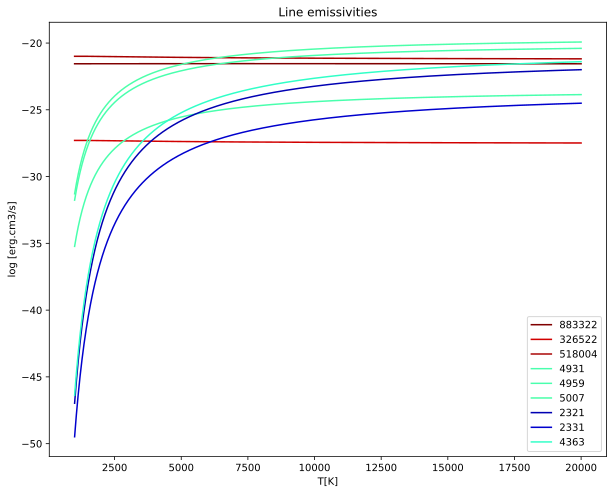

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
O3.plotEmiss(tem_min=1000, tem_max=20000, ionic_abund=1.0, den=1e3, style='-', 
             legend_loc=4, temLog=False, plot_total=False, plot_only_total=False, 
             legend=True, total_color='black', total_label='TOTAL', ax=ax)

You can use then take advantage of matplotlib's plotting tools to zoom, crop, or move the figure as you need.

A Grotrian diagram of the ion (i.e., a plot of the energy levels and transition wavelengths) can be obtained using:

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
O3.plotGrotrian(tem=1e4, den=1e2, thresh_int=1e-3, unit = 'eV', ax=ax)

The diagram can be tailored in various ways, zoomed in or saved into a file.
Atomic data are accessible using the following commands:

In [18]:
O3.getA()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5960000e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.0300000e-11, 9.6320000e-05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3220000e-06, 6.7909998e-03, 2.0460000e-02, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.2550000e-01, 6.9980000e-04, 1.6850000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1910000e-03, 2.3080000e+02, 5.7650000e+02, 5.7770000e-03,
        3.7600000e-11, 0.0000000e+00]])

In [19]:
O3.getOmegaArray().shape # 5*5 levels, 25 temperatures

(5, 5, 25)

In [20]:
O3.getOmega(tem=1e4)

array([[0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.5421 , 0.     , 0.     , 0.     , 0.     ],
       [0.25678, 1.25256, 0.     , 0.     , 0.     ],
       [0.24917, 0.75062, 1.26198, 0.     , 0.     ],
       [0.03268, 0.09849, 0.1657 , 0.6174 , 0.     ]])

In [21]:
help(O3.getOmega)

Help on method getOmega in module pyneb.core.pynebcore:

getOmega(tem, lev_i=-1, lev_j=-1, wave=-1) method of pyneb.core.pynebcore.Atom instance
    Return interpolated value of the collision strength value at the given temperature 
        for the complete array or a specified transition.
    If kappa is not None (non-maxwellian distribution of e-velocities), the collision 
        strength is corrected as in Mendoza & Bautista, 2014 ApJ 785, 91.
    
    Usage:
        O3.getOmega(15000.)
        O3.getOmega([8e3, 1e4, 1.2e4])
        O3.getOmega([8e3, 1e4, 1.2e4], 5, 4)
    
    Parameters:
        - tem    electronic temperature in K. May be an array.
        - lev_i  upper level
        - lev_j  lower level

